In [ ]:
...........................................lab...........................................

In [50]:
import tensorflow as tf


In [51]:
tf.__version__

'2.4.1'

In [52]:
!pip install tensorflow-datasets

In [45]:
%matplotlib inline
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt 
import math
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np




In [2]:
ds , md = tfds.load('fashion_mnist',as_supervised=True ,with_info=True)

In [3]:
type(ds)

dict

In [4]:
ds.keys()

dict_keys(['train', 'test'])

In [5]:
train_ds , test_ds = ds['train'] , ds['test']

In [6]:
type(md.splits)

tensorflow_datasets.core.splits.SplitDict

In [7]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_ds =  train_ds.map(normalize)
test_ds  =  test_ds.map(normalize)

#train_dataset =  train_dataset.cache()
#test_dataset  =  test_dataset.cache()

In [8]:
md.splits['test'].num_examples

10000

In [9]:
md.splits['train'].num_examples

60000

In [10]:
for img , lbl in train_ds.take(1):
    break

In [11]:
img =img.numpy()
img;

In [12]:
img= img.reshape((28 , 28))

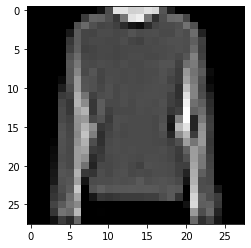

In [13]:
img
plt.imshow(img , cmap='gray');

In [14]:
type(test_ds)

tensorflow.python.data.ops.dataset_ops.MapDataset

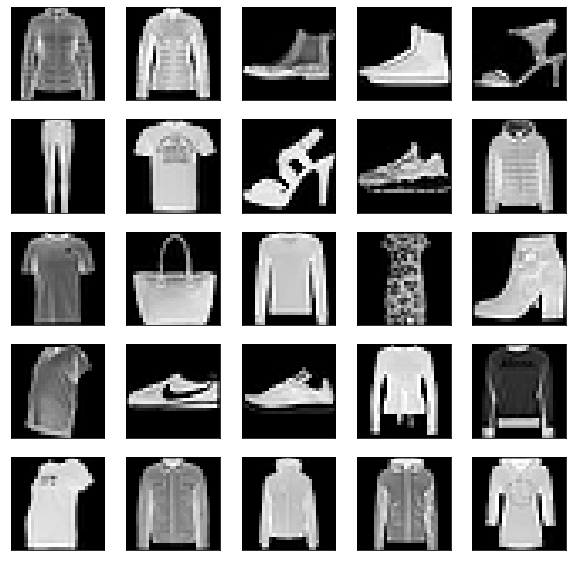

In [15]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_ds.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap='gray')
    #plt.xlabel(class_names[label])
    i += 1
plt.show()

In [16]:
#creat MOdel

In [17]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Flatten(input_shape=(28 , 28 , 1)),   # make flaten
    tf.keras.layers.Dense(128,activation='sigmoid'),
    tf.keras.layers.Dense(10)

    ]
)


In [18]:
model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
        metrics=['accuracy']
    )

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
bs =50 # pach size  subdivide data to 32 bits then 32 bit  etcetra
train_ds = train_ds.cache().repeat().shuffle(60000).batch(bs)
test_ds=test_ds.cache().batch(bs)

In [21]:
print(train_ds)

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


In [22]:

hist =model.fit(train_ds, epochs=200,steps_per_epoch=math.ceil(60000/bs))

Epoch 1/200
1200/1200 [==============================] - 10s 4ms/step - loss: 0.7911 - accuracy: 0.7457
Epoch 2/200
1200/1200 [==============================] - 5s 4ms/step - loss: 0.4131 - accuracy: 0.8544
Epoch 3/200
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3794 - accuracy: 0.8635
Epoch 4/200
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3481 - accuracy: 0.8744
Epoch 5/200
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3246 - accuracy: 0.8818
Epoch 6/200
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3072 - accuracy: 0.8873
Epoch 7/200
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2971 - accuracy: 0.8916
Epoch 8/200
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2785 - accuracy: 0.8981
Epoch 9/200
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2766 - accuracy: 0.8970
Epoch 10/200
1200/1200 [==============================] - 5s 5ms/step - 

In [23]:
test_loss, test_accuracy = model.evaluate(test_ds, steps=math.ceil(10000/bs))
print('Accuracy on test dataset:', test_accuracy)

200/200 [==============================] - 2s 8ms/step - loss: 0.7822 - accuracy: 0.8849
Accuracy on test dataset: 0.8848999738693237


In [25]:
y_pred = model.predict(test_ds)

predicted_categories = tf.argmax(y_pred, axis=1)

true_categories = tf.concat([y for x, y in test_ds], axis=0)

cm=confusion_matrix(predicted_categories, true_categories)


In [38]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [39]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[841   6  22  29   2   2 137   0   4   0]
 [  1 972   0  12   0   0   2   0   0   0]
 [ 21   1 819   9  93   1  78   0   6   0]
 [ 24  11  10 892  34   2  23   0   3   0]
 [  5   4  76  31 809   0  64   0   7   0]
 [  2   0   0   0   0 955   0  17   2  11]
 [ 99   5  70  21  60   0 689   0   7   1]
 [  0   0   0   0   0  17   0 959   5  40]
 [  7   1   3   6   2   5   7   0 965   0]
 [  0   0   0   0   0  18   0  24   1 948]]


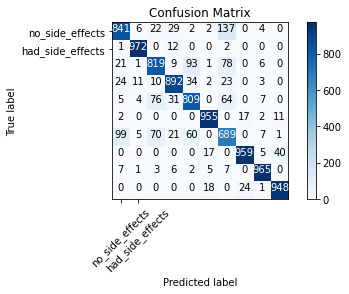

In [40]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

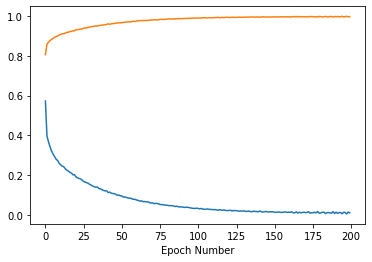

In [41]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.plot(hist.history['loss']);
plt.plot(hist.history['accuracy']);

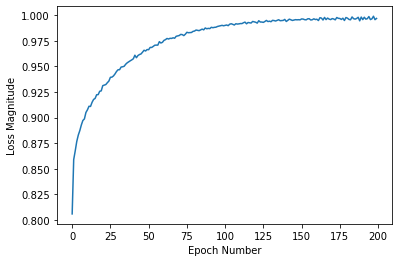

In [42]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['accuracy']);

In [43]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmptm8h36a3/assets


INFO:tensorflow:Assets written to: /tmp/tmptm8h36a3/assets


In [44]:
tflite_model_file = "mnist_model.tflite"
open(tflite_model_file, 'wb').write(tflite_model)

408668